# micro organism image classification 

#### What is CNN?

##### CNN is a powerful algorithm for image processing. These algorithms are currently the best algorithms we have for the automated processing of images. Many companies use these algorithms to do things like identifying the objects in an image.

In [3]:
import tensorflow as tf
import pandas as pd 
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt 
import os 
import pathlib 
import random

In [ ]:
from pathlib import Path
import imghdr

data_dir = "C:/Users/Asus/veri_manipülasyonu/Dataset_BUSI_with_GT"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [2]:
import pandas as pd 

In [3]:
path = 'C:/Users/Asus/veri_manipülasyonu/Micro_Organism'
data_dir = pathlib.Path(path)

In [5]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['Amoeba', 'Euglena', 'Hydra', 'Paramecium', 'Rod_bacteria',
       'Spherical_bacteria', 'Spiral_bacteria', 'Yeast'], dtype='<U18')

In [6]:
AmoebaPath = os.path.join(data_dir,'Amoeba')
EuglenaPath = os.path.join(data_dir,'Euglena')
HydraPath = os.path.join(data_dir,'Hydra')
ParameciumPath = os.path.join(data_dir,'Paramecium')
RodPath = os.path.join(data_dir,'Rod_bacteria')
SphericalPath = os.path.join(data_dir,'Sprecihal_bacteria')
SprialPath = os.path.join(data_dir,'Sprial_bacteria')
YeastPath = os.path.join(data_dir,'Yeast')

In [7]:
imageCount = len(list(data_dir.glob('*/*.jpg')))
imageCount

748

In [2]:
plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(5,5,i+1)
    random_class = random.choice(class_names)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.jpg"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

NameError: name 'plt' is not defined

In [9]:
batch_size = 32
img_height = 224
img_width = 224

In [10]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 784 files belonging to 8 classes.
Using 628 files for training.
Found 784 files belonging to 8 classes.
Using 156 files for validation.


In [11]:
from tensorflow.keras import layers 
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(8,activation="softmax")
])

In [12]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

In [13]:
epochs = 10
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

Epoch 1/10


D:\spyde\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


20/20 [==============================] - 29s 1s/step - loss: 2.5185 - accuracy: 0.1720 - val_loss: 2.0708 - val_accuracy: 0.2179
Epoch 2/10
20/20 [==============================] - 21s 1s/step - loss: 2.0209 - accuracy: 0.2357 - val_loss: 1.9681 - val_accuracy: 0.2051
Epoch 3/10
20/20 [==============================] - 21s 999ms/step - loss: 1.9336 - accuracy: 0.2596 - val_loss: 1.9490 - val_accuracy: 0.3269
Epoch 4/10
20/20 [==============================] - 21s 993ms/step - loss: 1.8307 - accuracy: 0.3105 - val_loss: 1.8375 - val_accuracy: 0.3013
Epoch 5/10
20/20 [==============================] - 21s 991ms/step - loss: 1.6620 - accuracy: 0.3790 - val_loss: 1.8113 - val_accuracy: 0.3590
Epoch 6/10
20/20 [==============================] - 21s 992ms/step - loss: 1.5006 - accuracy: 0.4809 - val_loss: 1.9623 - val_accuracy: 0.3333
Epoch 7/10
20/20 [==============================] - 20s 980ms/step - loss: 1.3092 - accuracy: 0.5159 - val_loss: 1.9825 - val_accuracy: 0.3141
Epoch 8/10
20/20

In [14]:
model.evaluate(val_data)

5/5 [==============================] - 2s 240ms/step - loss: 2.3556 - accuracy: 0.4103


[2.3555967807769775, 0.41025641560554504]

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

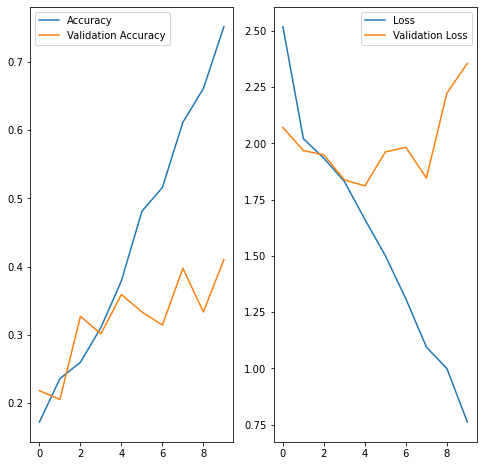

In [16]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

In [17]:
#We can see that the model overfit it learn to much the training data maybe because there aren't enough images so we will fit the model with less epochs to see if there any changes

In [18]:
epochs = 2
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

Epoch 1/2
20/20 [==============================] - 20s 967ms/step - loss: 0.6040 - accuracy: 0.8041 - val_loss: 2.5868 - val_accuracy: 0.3526
Epoch 2/2
20/20 [==============================] - 21s 1s/step - loss: 0.4475 - accuracy: 0.8694 - val_loss: 2.4746 - val_accuracy: 0.3718


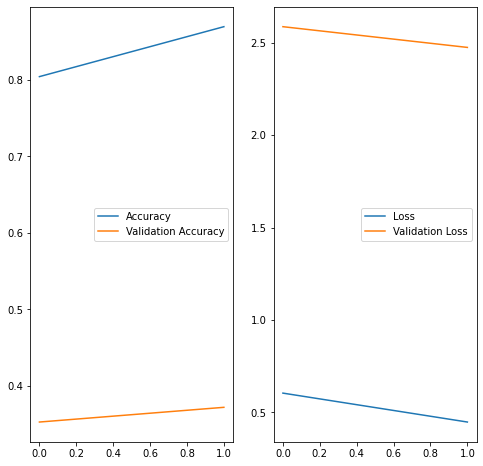

In [19]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

In [20]:
#Now we can see with 2 epochs that the model didn't overfit

# predictions

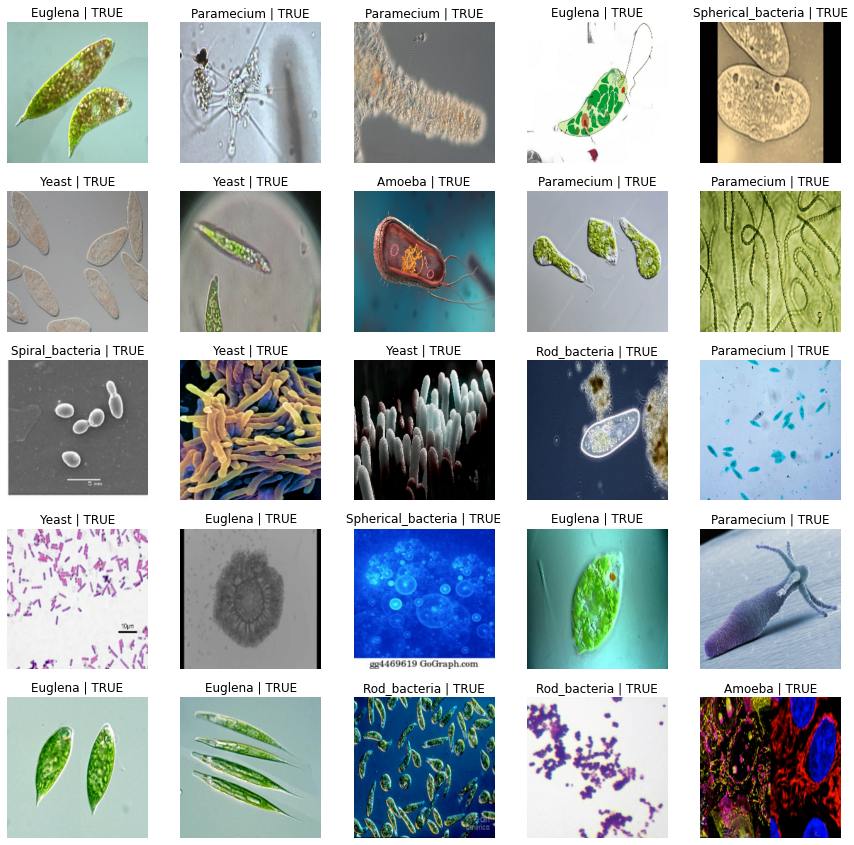

In [21]:
plt.figure(figsize=(15, 15))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        
        ax = plt.subplot(5, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")

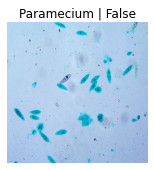

In [22]:
plt.figure(figsize=(15, 15))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(1):
        
        ax = plt.subplot(5, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")

Paramecium


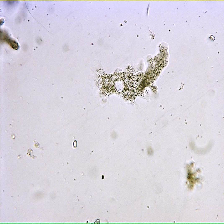

In [23]:
import numpy as np 
from keras.preprocessing import image

class_names = val_data.class_names

test_image_rgb = image.load_img("C:/Users/Asus/veri_manipülasyonu/single_prediction/arda2.jpg", target_size=(224,224, 3))

test_image = image.load_img("C:/Users/Asus/veri_manipülasyonu/single_prediction/arda2.jpg", target_size=(224,224, 3))
test_İmage = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

prediction = model.predict(test_image)
predicted_class = np.argmax(prediction)

print(class_names[predicted_class])
test_image_rgb